# ANOVA (one-way)

**2개 이상 그룹**의 평균에 차이가 있는지를 가설 검정하는 방법

여러개를 하나하나씩 비교 하는 것은 그룹수가 늘어 날 수록 에러가 커진다.

<https://en.wikipedia.org/wiki/Multiple_comparisons_problem>

이렇기 때문에 여러개의 그룹을 한꺼번에 비교 하는 방법이 필요함.

# Variation

**여러 그룹들이 하나의 분포에서부터 왔다** 라는 가정

이를 위한 지표는 **F-statistic**이며

<https://en.wikipedia.org/wiki/F-test>

$$ F = { {Variance-between-group} \over {Variance-with-in-group} }$$

F값이 높다

1. **분자(다른 그룹끼리의 분산)는 크고**, 분모 (전체 그룹의 분산)는 작아야 함.

2. 즉 **다른 그룹끼리의 분포가 다를 것이다** 라는 가정이 붙음.

<img src='https://i.imgur.com/mzqdUqq.png' width = 700>



## 공식 및 계산

<https://tensorflow.blog/f-%EA%B0%92-%EC%9C%A0%EB%8F%84%EC%8B%9D/>

<https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html>

$m$ = 전체 그룹 수, $n$ = 데이터 수

$$S_{w} = \sum_{i = 1}^{m} \sum_{j=1}^{n} (x_{ij} - x_{i.})^2$$
<br>
$$x_{i.} = \sum_{j = 1}^{n} {x_{ij} / n}$$
<br>
$$S_{b} = n \sum_{i=1}^m (x_{i.} - x_{..})^2 $$
<br>
$$x_{..} = {{\sum_{i=1}^m x_{i.} } \over {m}}$$
<br>
$$F = { { S_{b}}/{(m-1)} \over S_{w} / (nm-m)}$$
<br>
$$p( {F_{m-1, nm-m}} > F_{m-1, nm-m, \alpha}) = \alpha $$

## F-stat by hand

In [1]:
import numpy as np

g1 = np.array([0, 31, 6, 26, 40])

g2 = np.array([24, 15, 12, 22, 5])

g3 = np.array([32, 52, 30, 18, 36])

In [2]:
s1 = g1.sum()
s12 = (g1**2).sum()

s2 = g2.sum()
s22 = (g2**2).sum()

s3 = g3.sum()
s32 = (g3**2).sum()

|Group|||Data|||$\sum_j{x_{ij}}$|$\sum_j{x_{ij}^2}$|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|1|0|31|6|26|40|103|3273|
|2|24|15|12|22|5|78|1454|
|3|32|52|30|18|36|168|6248|

In [3]:
m = 3
n = 5

x1 = s1 / n # 20.6
x2 = s2 / n # 15.6
x3 = s3 / n # 33.6

x = (s1 + s2 + s3) / (n+n+n) # 23.2667
xx = x**2

ssb = n * ((x1 - x)**2 + (x2-x)**2 + (x3-x)**2) # 863.3335
ssw1 = s12 + s22 + s32 # 10975

ssw = ssw1 - n*m*xx - ssb # 1991.5772

F = (ssb / (m-1)) / (ssw / (n*m - m))

print(F) # 2.60

2.6009238802972487


## F-stat by scipy

In [4]:
from scipy.stats import f_oneway

f_oneway(g1, g2, g3) # pvalue = 0.11 

F_onewayResult(statistic=2.6009238802972483, pvalue=0.11524892355706169)

# Many Samples

## 큰 수의 법칙 ( Law of large numbers )

sample 데이터의 수가 커질 수록, sample의 통계치는 점점 모집단의 모수와 같아진다. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

population = np.random.normal(50, 10, 1000) # mu = 50, sd = 1, 
population.var()

99.21071357014802

In [6]:
np.random.choice(population, 5).var()

65.41966806481832

In [7]:
np.random.choice(population, 15).var()

75.66263145894844

In [8]:
np.random.choice(population, 50).var()

81.94606371801326

In [9]:
np.random.choice(population, 100).var()

85.68056404690424

In [10]:
np.random.choice(population, 200).var()


99.92783346712717

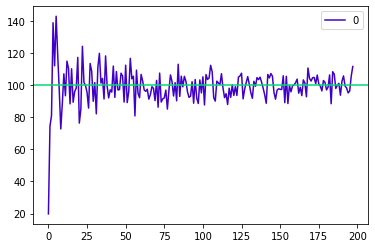

In [11]:
dat = []

for i in np.arange(start = 5, stop = 995, step = 5) :
  s = np.random.choice(population, i)
  dat.append(s.var())
dat

(pd
 .DataFrame(dat)
 .plot
 .line(color = '#4000c7')
 .axhline(y = 100, color = '#00da75')
 );

* method chaining?

# 중심극한정리 ( Central Limit Theorem, CLT )

Sample 데이터의 수가 많아질 수록, **sample의 평균**은 정규분포에 근사한 형태로 나타난다.

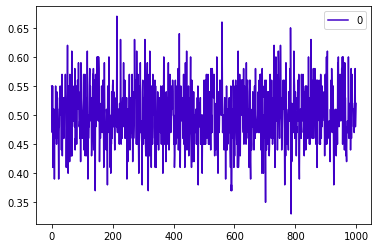

In [12]:
sample_means = []

for x in range(0, 1000):
  coinflips = np.random.binomial(n = 1, p = 0.5, size = 100) # binomial distribution
  sample_means.append(coinflips.mean())

pd.DataFrame(sample_means).plot(color = '#4000c7');

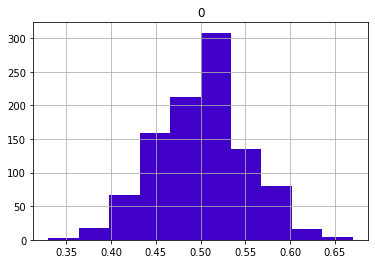

In [13]:
pd.DataFrame(sample_means).hist(color = '#4000c7');

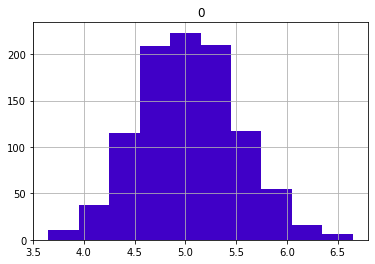

In [14]:
sample_means2 = []

for x in range(0,1000):
  one_poiss = np.random.poisson(5, 20) # Poisson 분포 데이터
  sample_means2.append(one_poiss.mean())

pd.DataFrame(sample_means2).hist(color = '#4000c7');

sampling을 몇번 하느냐도 중요하지만, sampling을 얼마나 하느냐도 다름.

In [15]:
sample_means_small = []
sample_means_medium = []
sample_means_large = []

# b(n, p)
# N(0,1) ~ N(u, sd)

for x in range(0, 3000):
  coinflips_small = np.random.binomial(n = 1, p = .5, size = 10)
  coinflips_medium = np.random.binomial(n = 1, p = .5, size = 50)
  coinflips_large = np.random.binomial(n = 1, p = .5, size = 200)
  sample_means_small.append(coinflips_small.mean())
  sample_means_medium.append(coinflips_medium.mean())
  sample_means_large.append(coinflips_large.mean())

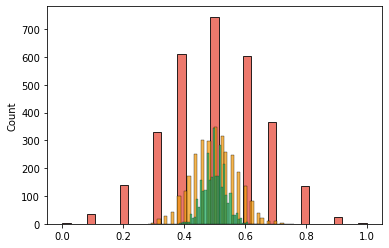

In [16]:
import seaborn as sns
ax = plt.subplots()

sns.histplot(sample_means_small, color = '#e74c3c')

sns.histplot(sample_means_medium, color = '#f39c12')

sns.histplot(sample_means_large, color = '#27ae60');
  
# sample_means_small -> red 
# sample_means_medium -> orange
# sample_means_large -> green

## Point estimate VS Interval estimate

ex) 초등학교 3학년 1000명의 평균 키.

130cm일 것이다.

125 ~ 135cm 정도 일 것이다.

120 ~ 140cm 정도 일 것이다.

1cm ~ 300cm 정도 일 것이다. 

--- 

예측 하는 "구간"이 **넓어질 수록** 맞을 확률(`신뢰도`)은 올라감. 

# 신뢰도 

> 신뢰도가 95% 라는 의미는 표본을 100번 뽑았을때 95번은 신뢰구간 내에 모집단의 평균이 포함된다.

## 신뢰 구간의 설정 및 해석

<img src='https://i.imgur.com/dbhRomh.png' width = 550> 

이 구간을 수학적으로 표현한 내용이 아래의 식과 같으며

$$\bar {x} \pm {t \cdot {s \over \sqrt{n} } }$$

<br>

- $\bar{x}$ 를 `estimated mean`.

- $ {t \cdot {s \over \sqrt{n} } }$ 를 `error`라 부름


In [17]:
from scipy import stats

def confidence_interval(data, confidence = 0.95):
  
  """
  주어진 데이터의 표본 **평균**에 대한 신뢰구간을 계산.
  기본 값으로 t-분포와 양방향 (two-tailed), 95%의 신뢰도를 사용. 
  
  입력 값 : 
    data - 여러 개로 이루어진 (list 혹은 numpy 배열) 표본 관측치
    confidence - 신뢰구간을 위한 신뢰도 
  
  반환 되는 값:
    (평균, 하한, 상한구간)으로 이루어진 tuple
  """

  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  
  # std / sqrt(n)
  stderr = stats.sem(data) 
  # Standard Error of Mean (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html)
  # s / sqrt(n)

  # length_of_one_interval
  interval = stderr * stats.t.ppf( (1 + confidence) / 2 , n - 1) # ppf : inverse of cdf
  return (mean, mean - interval, mean + interval)

# cdf -> t 를 넣으면 %
# ppf -> % 를 넣으면 t

# 1 + 0.95 / 2 -> 0.975
# (1 - 0.95) / 2 -> 0.025

In [18]:
np.random.seed(123)

data2 = np.random.normal(50, 10, 1000)

sample = np.random.choice(data2, 10)

confidence_interval(sample)

(44.28501220284126, 37.93312500671013, 50.63689939897239)

In [19]:
confidence_interval(np.random.choice(data2, 3))

(54.44720084005697, 21.73030800723631, 87.16409367287764)

In [20]:
confidence_interval(np.random.choice(data2, 30))

(49.75170708068175, 46.21251606095514, 53.290898100408356)

## 신뢰구간의 시각화 (시각화의 이해를 위해 평균 50으로 조정)

<ipython-input-21-e16988a54180>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([50, 50], [0, 0.05], 'k-', lw = 2, color = '#ff6f15')
<ipython-input-21-e16988a54180>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  plt.plot([53.54,53.54], [0, 0.05], 'k:', lw = 2, color = '#4000c7')
<ipython-input-21-e16988a54180>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  plt.plot([46.46,46.46], [0, 0.05], 'k:', lw = 2, color = '#4000c7');
<ipython-input-21-e16988a54180>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([56.35,56.

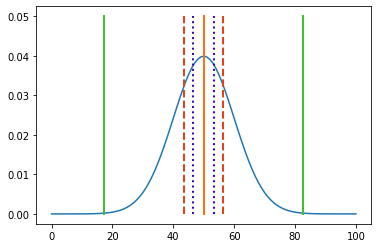

In [21]:
x = np.linspace(0, 100, 101) # 0 ~ 100 by 100 

y = stats.norm(50, 10).pdf(x) 

# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.plot.html 참조

# plt.plot([A, A], [B, C]) : (A, B) ~ (A,C) 까지의 Line

plt.plot(x, y) # blue line

plt.plot([50, 50], [0, 0.05], 'k-', lw = 2, color = '#ff6f15') 

# 30 sample
plt.plot([53.54,53.54], [0, 0.05], 'k:', lw = 2, color = '#4000c7')
plt.plot([46.46,46.46], [0, 0.05], 'k:', lw = 2, color = '#4000c7');

# 10 sample
plt.plot([56.35,56.35], [0, 0.05], 'k--', lw = 2, color = '#e84118')
plt.plot([43.65,43.65], [0, 0.05], 'k--', lw = 2, color = '#e84118');

# 3 sample

plt.plot([82.72,82.72], [0, 0.05], 'k-', lw = 2, color = '#44bd32')
plt.plot([17.29,17.29], [0, 0.05], 'k-', lw = 2, color = '#44bd32');

## CI with scipy

In [22]:
np.random.seed(123)

data2 = np.random.normal(50, 10, 1000)

sample = np.random.choice(data2, 10)

confidence_interval(sample)

(44.28501220284126, 37.93312500671013, 50.63689939897239)

$$\bar {x} \pm {t \cdot {s \over \sqrt{n} } }$$

In [23]:
from scipy.stats import t

# 표본의 크기
n = len(sample)
# 자유도
dof = n-1
# 평균의 평균
mean = np.mean(sample)
# 표본의 표준편차
sample_std = np.std(sample, ddof = 1)
# 표준 오차
std_err = sample_std / n ** 0.5 # sample_std / sqrt(n)

CI = t.interval(.95, dof, loc = mean, scale = std_err) # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html
print("95% 신뢰구간: ", CI)

95% 신뢰구간:  (37.93312500671013, 50.63689939897239)


# Exercise

서울시 기간별 시간평균 대기환경 정보 데이터셋을 이용

<img src='https://user-images.githubusercontent.com/6457691/89852263-740add80-dbc9-11ea-9e6b-8059b3f7e479.png'>

<https://data.seoul.go.kr/dataList/OA-2221/S/1/datasetView.do>

### `2020년 3월`의 송파구 데이터만 사용

## 1. 데이터셋을 불러오기

  - 데이터는 `df`라는 변수에 저장되어야 하며
  - Feature로는 `측정일시`, `측정소명`, `오존(ppm)` 만 사용.
  - 인덱스를 초기화.

In [24]:
import numpy as np
import pandas as pd
import scipy as sp
import warnings
warnings.filterwarnings(action='ignore')

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
filename = '/content/drive/MyDrive/DS_camp/session1/air.csv'

In [27]:
data = pd.read_csv(filename, encoding='cp949')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18600 entries, 0 to 18599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   측정일시            18600 non-null  int64  
 1   권역코드            18600 non-null  int64  
 2   권역명             18600 non-null  object 
 3   측정소코드           18600 non-null  int64  
 4   측정소명            18600 non-null  object 
 5   미세먼지 1시간(㎍/㎥)   18600 non-null  int64  
 6   미세먼지 24시간(㎍/㎥)  18600 non-null  int64  
 7   초미세먼지(㎍/㎥)      18600 non-null  int64  
 8   오존(ppm)         18600 non-null  float64
 9   이산화질소농도(ppm)    18600 non-null  float64
 10  일산화탄소농도(ppm)    18600 non-null  float64
 11  아황산가스농도(ppm)    18600 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1.7+ MB


In [28]:
data.head()

,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,202003312300,100,도심권,111123,종로구,47,48,22,0.036,0.018,0.4,0.004
1,202003312300,100,도심권,111131,용산구,55,52,21,0.024,0.033,0.5,0.003
2,202003312300,100,도심권,111121,중구,43,43,24,0.034,0.020,0.4,0.003
3,202003312300,101,서북권,111181,은평구,51,54,18,0.047,0.010,0.3,0.003
4,202003312300,101,서북권,111191,서대문구,58,57,21,0.047,0.012,0.6,0.003


In [29]:
data['측정일시']= data['측정일시'].astype('str')

data['측정일시'] = pd.to_datetime(data['측정일시'])

data = data[['측정일시', '측정소명', '오존(ppm)']]

df = data[data['측정소명'] == '송파구']

df = df.reset_index(drop=True)

df.head()

,측정일시,측정소명,오존(ppm)
0,2020-03-31 23:00:00,송파구,0.020
1,2020-03-31 22:00:00,송파구,0.021
2,2020-03-31 21:00:00,송파구,0.025
3,2020-03-31 20:00:00,송파구,0.032
4,2020-03-31 19:00:00,송파구,0.034


## 2. 데이터셋으로 부터 2개의 샘플을 생성.

- `s1`에 저장된 1개는 20개의 데이터, `s2`에 저장된 다른 1개는 200개이며 
- 두 경우 모두 `random_state`로 `42`를 설정.

In [41]:
s1 = df.sample(n = 20, random_state= 42)
s2 = df.sample(n = 200, random_state= 42)

In [31]:
s1.head()

,측정일시,측정소명,오존(ppm)
609,2020-03-06 14:00:00,송파구,0.021
539,2020-03-09 12:00:00,송파구,0.020
694,2020-03-03 01:00:00,송파구,0.002
350,2020-03-17 09:00:00,송파구,0.009
174,2020-03-24 17:00:00,송파구,0.044


In [32]:
s2.head()

,측정일시,측정소명,오존(ppm)
609,2020-03-06 14:00:00,송파구,0.021
539,2020-03-09 12:00:00,송파구,0.020
694,2020-03-03 01:00:00,송파구,0.002
350,2020-03-17 09:00:00,송파구,0.009
174,2020-03-24 17:00:00,송파구,0.044


## 3. 두 샘플데이터에 대해서 `오존(ppm)`항목의 표본 평균을 계산

In [33]:
print(s1['오존(ppm)'].mean(), s2['오존(ppm)'].mean())

0.02175 0.02292


## 4. 위에서 추정한 값들을 바탕으로, 95%에 해당하는 신뢰구간을 `CI1과` `CI2`에 계산.

  - `ddof`는 `1`을 사용.

In [34]:
from scipy.stats import t

def c_int(sample):
  n = len(sample)
  dof = n-1
  mean = np.mean(sample)
  sample_std = np.std(sample, ddof=1)
  std_err = sample_std / n ** 0.5
  CI = t.interval(.95, dof, loc = mean, scale = std_err)
  return print("95% 신뢰구간 : ", CI)

In [35]:
"""
from scipy import stats

def confidence_interval(data, confidence = 0.95):
    
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)

    stderr = stats.sem(data) 

    interval = stderr * stats.t.ppf( (1 + confidence) / 2 , n - 1)
    return (mean - interval, mean + interval)
"""

'\nfrom scipy import stats\n\ndef confidence_interval(data, confidence = 0.95):\n    \n    data = np.array(data)\n    mean = np.mean(data)\n    n = len(data)\n\n    stderr = stats.sem(data) \n\n    interval = stderr * stats.t.ppf( (1 + confidence) / 2 , n - 1)\n    return (mean - interval, mean + interval)\n'

In [36]:
CI1 = c_int(s1['오존(ppm)'])
CI1

95% 신뢰구간 :  (0.015060460813957323, 0.028439539186042674)


In [37]:
CI2 = c_int(s2['오존(ppm)'])
CI2

95% 신뢰구간 :  (0.02100651526262625, 0.02483348473737375)


## 5. `plt.bar`를 사용하여 다음과 같은 신뢰구간 시각화 하라.
  - 이때 보라색 선에 해당 하는 값을 `pop_mean`에 저장.
  - `colors = '#4000c7'`을 사용.

<img src='https://i.imgur.com/3orh30m.png'>

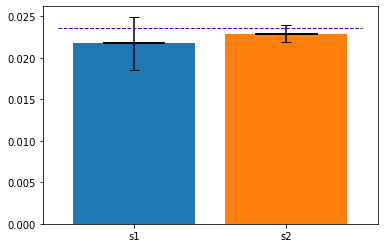

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

s1 = s1['오존(ppm)']
s2 = s2['오존(ppm)']
s1_std = np.std(s1,ddof = 1)
s1_err = s1_std / len(s1)**0.5

s2_std = np.std(s2,ddof = 1)
s2_err = s2_std / len(s2)**0.5

pop_mean = np.mean(df['오존(ppm)'])

xlabel = ['s1', 's2']
y = [s1.mean(), s2.mean()]
x = np.arange(len(y))
plt.bar(x, y, color = ['tab:blue','tab:orange'], yerr = [s1_err, s2_err], ecolor = 'black' , capsize = 5)
plt.plot([-0.2, 0.2], [s1.mean(), s1.mean()] , lw=2 ,color="black")
plt.plot([0.8, 1.2], [s2.mean(), s2.mean()] , lw=2 ,color="black")
plt.plot([-0.5,1.5],[pop_mean, pop_mean], "k--", lw=1, color='#4000c7')
plt.xticks(x,xlabel);


In [43]:
"""
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


sample = ['s1', 's2']
pop_mean = np.mean(df['오존(ppm)'])

plt.bar(x='s1', height=s1_mean, yerr=CI1[0]-s1_mean, capsize=10)
plt.bar(x='s2', height=s2_mean, yerr=CI2[0]-s2_mean, capsize=10)
plt.axhline(pop_mean, linestyle='--', color='#4000c7')
plt.axhline(s1_mean, color = 'black', xmin = 0.15, xmax = 0.35)
plt.axhline(s2_mean, color = 'black', xmin = 0.65, xmax = 0.85)

plt.show()
"""

"\nfig = plt.figure()\nax = fig.add_axes([0,0,1,1])\n\n\nsample = ['s1', 's2']\npop_mean = np.mean(df['오존(ppm)'])\n\nplt.bar(x='s1', height=s1_mean, yerr=CI1[0]-s1_mean, capsize=10)\nplt.bar(x='s2', height=s2_mean, yerr=CI2[0]-s2_mean, capsize=10)\nplt.axhline(pop_mean, linestyle='--', color='#4000c7')\nplt.axhline(s1_mean, color = 'black', xmin = 0.15, xmax = 0.35)\nplt.axhline(s2_mean, color = 'black', xmin = 0.65, xmax = 0.85)\n\nplt.show()\n"